In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from zipfile import ZipFile
import os
import glob
from pathlib import Path
from rasterio.merge import merge

In [ ]:
year = "22"
tile_id = f"41{year}-74"
test_path = f"../data/geotiff_50cm_{tile_id}"
folder = f"../data"

In [27]:
for zip_path in glob.glob(os.path.join(folder, "*.zip")):
    zip_name = os.path.splitext(os.path.basename(zip_path))[0]
    print(zip_name)
    extract_to = os.path.join(folder, zip_name)

    os.makedirs(extract_to, exist_ok=True)

    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

dxf_1m_4121-01
dxf_1m_4121-02
dxf_1m_4121-09
dxf_1m_4121-10
dxf_1m_4122-33
dxf_1m_4122-34
dxf_1m_4122-41
dxf_1m_4122-42
dxf_1m_4122-49
dxf_1m_4122-50
dxf_1m_4122-57
dxf_1m_4122-58
dxf_1m_4122-65
dxf_1m_4122-66
dxf_1m_4122-73
dxf_1m_4122-74
geotiff_50cm_4121-01
geotiff_50cm_4121-02
geotiff_50cm_4121-09
geotiff_50cm_4121-10
geotiff_50cm_4122-33
geotiff_50cm_4122-34
geotiff_50cm_4122-41
geotiff_50cm_4122-42
geotiff_50cm_4122-49
geotiff_50cm_4122-50
geotiff_50cm_4122-57
geotiff_50cm_4122-58
geotiff_50cm_4122-65
geotiff_50cm_4122-66
geotiff_50cm_4122-73
geotiff_50cm_4122-74
xyz_1m_4121-01
xyz_1m_4121-02
xyz_1m_4121-09
xyz_1m_4121-10
xyz_1m_4122-33
xyz_1m_4122-34
xyz_1m_4122-41
xyz_1m_4122-42
xyz_1m_4122-49
xyz_1m_4122-50
xyz_1m_4122-57
xyz_1m_4122-58
xyz_1m_4122-65
xyz_1m_4122-66
xyz_1m_4122-73
xyz_1m_4122-74


In [3]:
dtm_path = f"{test_path}/dgm_50cm_{tile_id}_20{year}.tif"
dsm_path = f"{test_path}/dom_50cm_{tile_id}_20{year}.tif"
# Load DTM and DSM
with rasterio.open(dtm_path) as dtm_src:
    dtm = dtm_src.read(1)
    dtm_meta = dtm_src.meta
    dtm_transform = dtm_src.transform
    dtm_crs = dtm_src.crs

with rasterio.open(dsm_path) as dsm_src:
    dsm = dsm_src.read(1)
    dsm_meta = dsm_src.meta

print(f"DTM shape: {dtm.shape}")
print(f"DTM resolution: {dtm_transform.a}m x {abs(dtm_transform.e)}m")
print(f"DTM CRS: {dtm_crs}")
print(f"Elevation range: {dtm.min():.2f}m to {dtm.max():.2f}m")

DTM shape: (2001, 2501)
DTM resolution: 0.5m x 0.5m
DTM CRS: EPSG:31255
Elevation range: 2025.76m to 2898.14m


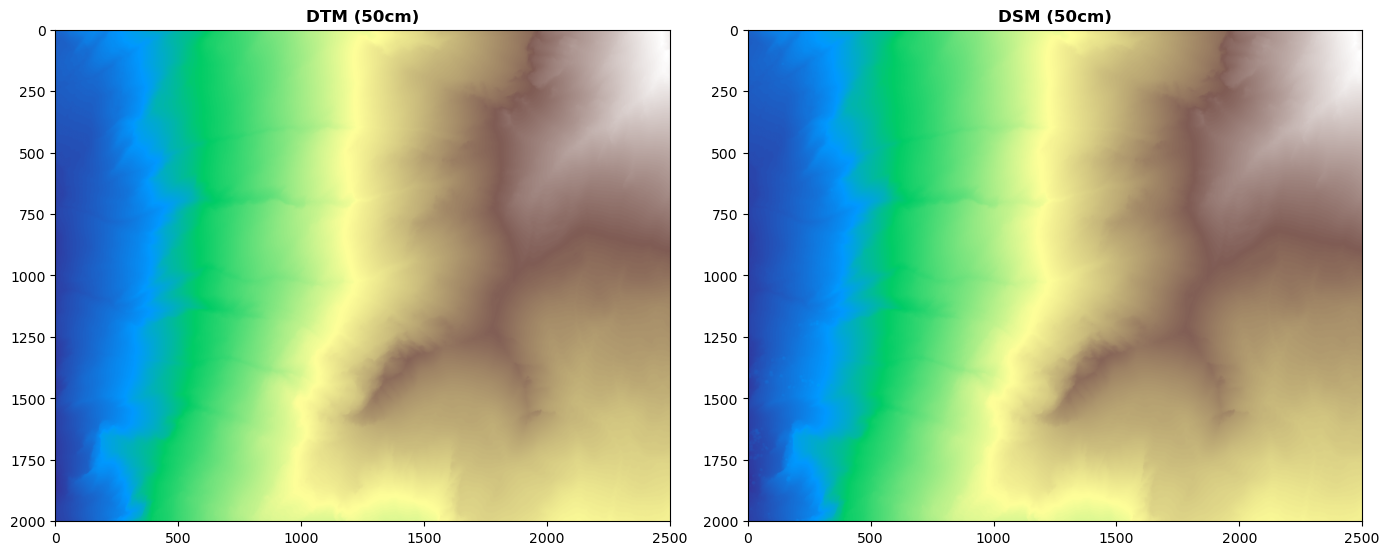

In [36]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
show(dtm, ax=axes[0], cmap='terrain', title='DTM (50cm)')
show(dsm, ax=axes[1], cmap='terrain', title='DSM (50cm)')
plt.tight_layout()

In [35]:
dtm_files = []
dsm_files = []
root = Path(folder)

In [36]:
for folder in root.rglob("*geotiff_50cm*"):
    if folder.is_dir():
        folder_name = os.path.splitext(os.path.basename(folder))[0]
        tile_id = folder_name.split("_")[-1]
        temp = tile_id.split("-")[0]
        if temp == "4121":
            year = "2021_2022"
        elif temp == "4122":
            year = "2022"
        dtm_path = Path(f"{folder}/dgm_50cm_shd_{tile_id}_{year}.tif")
        dsm_path = Path(f"{folder}/dom_50cm_shd_{tile_id}_{year}.tif")

        print(dtm_path)

        if dtm_path.exists():
            dtm_files.append(str(dtm_path))
        if dsm_path.exists():
            dsm_files.append(str(dsm_path))
        print(f"{len(dtm_files)} DTM tiles, {len(dsm_files)} DSM tiles.")

..\data\geotiff_50cm_4121-01\dgm_50cm_shd_4121-01_2021_2022.tif
1 DTM tiles, 1 DSM tiles.
..\data\geotiff_50cm_4121-02\dgm_50cm_shd_4121-02_2021_2022.tif
2 DTM tiles, 2 DSM tiles.
..\data\geotiff_50cm_4121-09\dgm_50cm_shd_4121-09_2021_2022.tif
3 DTM tiles, 3 DSM tiles.
..\data\geotiff_50cm_4121-10\dgm_50cm_shd_4121-10_2021_2022.tif
4 DTM tiles, 4 DSM tiles.
..\data\geotiff_50cm_4122-33\dgm_50cm_shd_4122-33_2022.tif
5 DTM tiles, 5 DSM tiles.
..\data\geotiff_50cm_4122-34\dgm_50cm_shd_4122-34_2022.tif
6 DTM tiles, 6 DSM tiles.
..\data\geotiff_50cm_4122-41\dgm_50cm_shd_4122-41_2022.tif
7 DTM tiles, 7 DSM tiles.
..\data\geotiff_50cm_4122-42\dgm_50cm_shd_4122-42_2022.tif
8 DTM tiles, 8 DSM tiles.
..\data\geotiff_50cm_4122-49\dgm_50cm_shd_4122-49_2022.tif
9 DTM tiles, 9 DSM tiles.
..\data\geotiff_50cm_4122-50\dgm_50cm_shd_4122-50_2022.tif
10 DTM tiles, 10 DSM tiles.
..\data\geotiff_50cm_4122-57\dgm_50cm_shd_4122-57_2022.tif
11 DTM tiles, 11 DSM tiles.
..\data\geotiff_50cm_4122-58\dgm_50cm_shd

In [37]:
# Merge DTM tiles
if dtm_files:
    dtm_to_mosaic = []
    for fp in dtm_files:
        src = rasterio.open(fp)
        dtm_to_mosaic.append(src)
    
    # Merge function creates a mosaic
    dtm_mosaic, dtm_transform = merge(dtm_to_mosaic)
    
    # Update metadata for the merged raster
    dtm_meta = dtm_to_mosaic[0].meta.copy()
    dtm_meta.update({
        "driver": "GTiff",
        "height": dtm_mosaic.shape[1],
        "width": dtm_mosaic.shape[2],
        "transform": dtm_transform,
        "compress": "lzw"  # Optional: compression to save space
    })
    
    # Write merged DTM
    output_dtm = root / "merged_dtm_shd_2022.tif"
    with rasterio.open(output_dtm, "w", **dtm_meta) as dest:
        dest.write(dtm_mosaic)
    
    # Close all source files
    for src in dtm_to_mosaic:
        src.close()
    
    print(f"DTM merged and saved to: {output_dtm}")

DTM merged and saved to: ..\data\merged_dtm_shd_2022.tif


In [38]:
# Merge DSM tiles
if dsm_files:
    dsm_to_mosaic = []
    for fp in dsm_files:
        src = rasterio.open(fp)
        dsm_to_mosaic.append(src)
    
    dsm_mosaic, dsm_transform = merge(dsm_to_mosaic)
    
    dsm_meta = dsm_to_mosaic[0].meta.copy()
    dsm_meta.update({
        "driver": "GTiff",
        "height": dsm_mosaic.shape[1],
        "width": dsm_mosaic.shape[2],
        "transform": dsm_transform,
        "compress": "lzw"
    })
    
    # Write merged DSM
    output_dsm = root / "merged_dsm_shd_2022.tif"
    with rasterio.open(output_dsm, "w", **dsm_meta) as dest:
        dest.write(dsm_mosaic)
    
    for src in dsm_to_mosaic:
        src.close()
    
    print(f"DSM merged and saved to: {output_dsm}")

DSM merged and saved to: ..\data\merged_dsm_shd_2022.tif


In [39]:
with rasterio.open(f"{root}/{output_dtm}") as f:
    dtm = f.read(1)
with rasterio.open(f"{root}/{output_dsm}") as f:
    dsm = f.read(1)

In [42]:
dtm.shape

(16000, 5000)

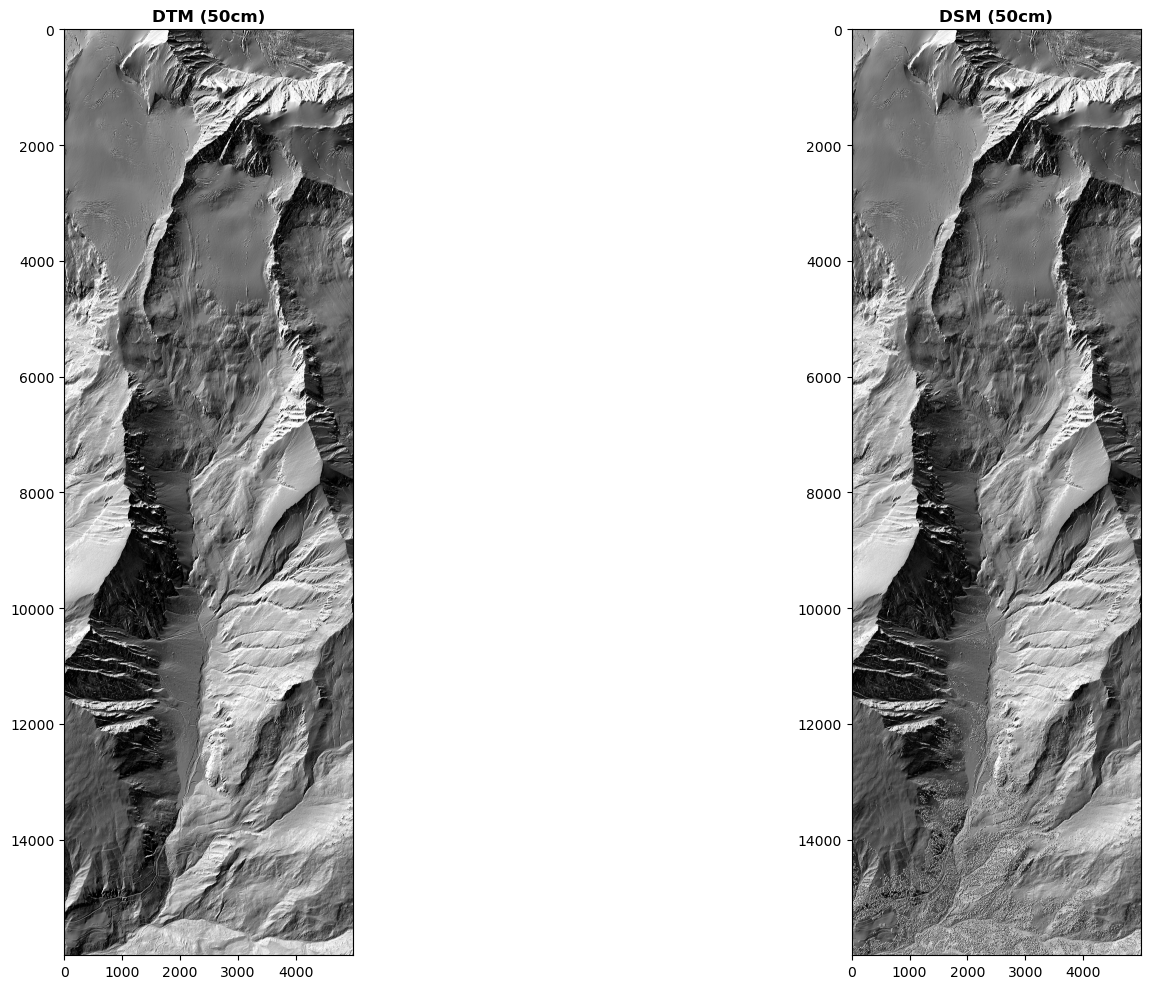

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
show(dtm, ax=axes[0], cmap='gray', title='DTM (50cm)')
show(dsm, ax=axes[1],cmap='gray', title='DSM (50cm)')
plt.tight_layout()

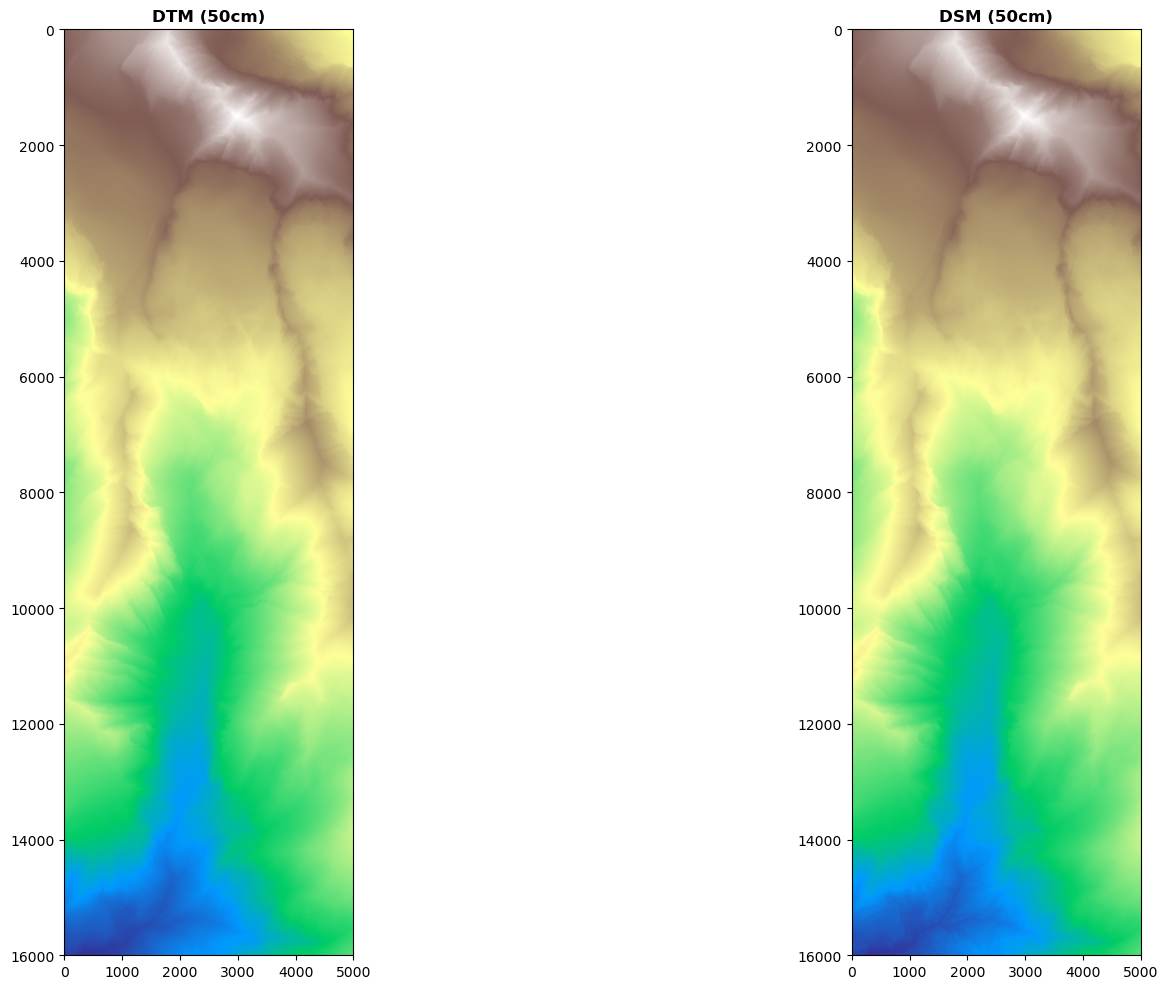

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
show(dtm, ax=axes[0], cmap='terrain', title='DTM (50cm)')
show(dsm, ax=axes[1],cmap='terrain', title='DSM (50cm)')
plt.tight_layout()

In [28]:
ortho_files = []

In [29]:
for file_path in root.rglob("*dop_*"):
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    year = file_name.split("_")[-1]
    if year == "2022":
        ortho_path = Path(f"{root}/{file_name}.tif")
        ortho_files.append(ortho_path)
    print(f"{len(ortho_files)} tiles")

1 tiles
2 tiles
2 tiles
2 tiles
3 tiles
4 tiles
5 tiles
6 tiles
7 tiles
8 tiles
9 tiles
10 tiles
11 tiles
12 tiles
13 tiles
14 tiles


In [30]:
# Merge Ortho tiles
if ortho_files:
    ortho_to_mosaic = []
    for fp in ortho_files:
        src = rasterio.open(fp)
        ortho_to_mosaic.append(src)
    
    ortho_mosaic, ortho_transform = merge(ortho_to_mosaic)
    
    ortho_meta = ortho_to_mosaic[0].meta.copy()
    ortho_meta.update({
        "driver": "GTiff",
        "height": ortho_mosaic.shape[1],
        "width": ortho_mosaic.shape[2],
        "transform": ortho_transform,
        "compress": "lzw"
    })
    
    # Write merged DSM
    output_ortho = root / "merged_ortho_2022.tif"
    with rasterio.open(output_ortho, "w", **ortho_meta) as dest:
        dest.write(ortho_mosaic)
    
    for src in ortho_to_mosaic:
        src.close()
    
    print(f"Ortho merged and saved to: {output_ortho}")

Ortho merged and saved to: ..\data\merged_ortho_2022.tif


Text(0.5, 1.0, 'Normalized DSM - Vegetation & Building Heights')

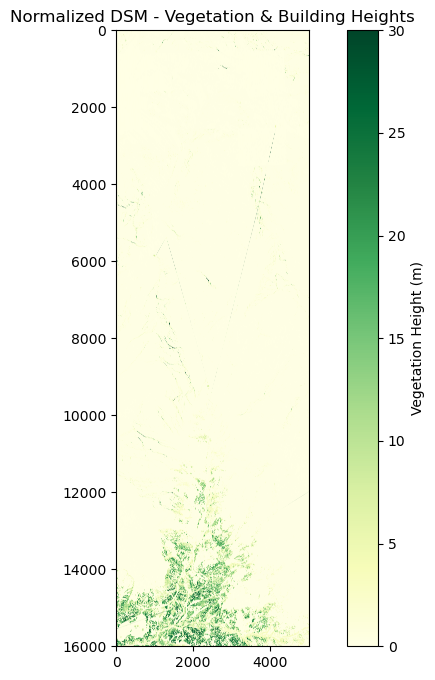

In [ ]:
# Normalized DSM = vegetation and building heights
ndsm = dsm - dtm

# Mask negative values (errors)
ndsm[ndsm < 0] = 0

# Save nDSM
with rasterio.open('nDSM_50cm.tif', 'w', **dtm_meta) as dst:
    dst.write(ndsm, 1)

# Visualize vegetation height
plt.figure(figsize=(10, 8))
plt.imshow(ndsm, cmap='YlGn', vmin=0, vmax=30)
plt.colorbar(label='Vegetation Height (m)')
plt.title('Normalized DSM - Vegetation & Building Heights')
plt.savefig('02_ndsm_vegetation.png', dpi=150)